# MACHINE LEARNING MODEL PREDICTION FOR STUDENT SCORE USING REGRESSION ALGORITHM

NAME = PRITAM KUMAR DAS 

SID = 2245979

DEPARTMENT = BTECH (COMPUTER SCIENCE (AIML))

SUBMITTED TO = SANGMESH SIR

## IMPORT SOME LIBRARY OF PYTHON 

In [276]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


## IMPORT THE DATASET

In [277]:
data = pd.read_csv('student.csv')

## STUDENT SCORE DATASET

In [278]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [279]:
p=data.sample(500)
p

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
608,female,group E,some college,standard,none,61,64,62
881,female,group E,bachelor's degree,standard,completed,71,70,70
35,male,group E,associate's degree,standard,completed,81,81,79
723,male,group C,high school,standard,none,50,48,42
470,female,group C,associate's degree,standard,completed,83,85,90
...,...,...,...,...,...,...,...,...
116,female,group B,bachelor's degree,free/reduced,none,75,85,82
130,male,group D,master's degree,standard,none,89,84,82
584,female,group D,some college,standard,none,69,77,77
558,female,group B,associate's degree,free/reduced,none,53,70,70


In [280]:
p.iloc[0]

gender                               female
race/ethnicity                      group E
parental level of education    some college
lunch                              standard
test preparation course                none
math score                               61
reading score                            64
writing score                            62
Name: 608, dtype: object

In [281]:
p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 608 to 692
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       500 non-null    object
 1   race/ethnicity               500 non-null    object
 2   parental level of education  500 non-null    object
 3   lunch                        500 non-null    object
 4   test preparation course      500 non-null    object
 5   math score                   500 non-null    int64 
 6   reading score                500 non-null    int64 
 7   writing score                500 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 35.2+ KB


In [282]:
p.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [283]:
print(data.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [284]:
print(data.tail())

     gender race/ethnicity parental level of education         lunch  \
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86  


In [285]:
print(data.describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [286]:
data.mean()

C:\Users\91628\AppData\Local\Temp\ipykernel_23064\531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

In [287]:
print(data.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


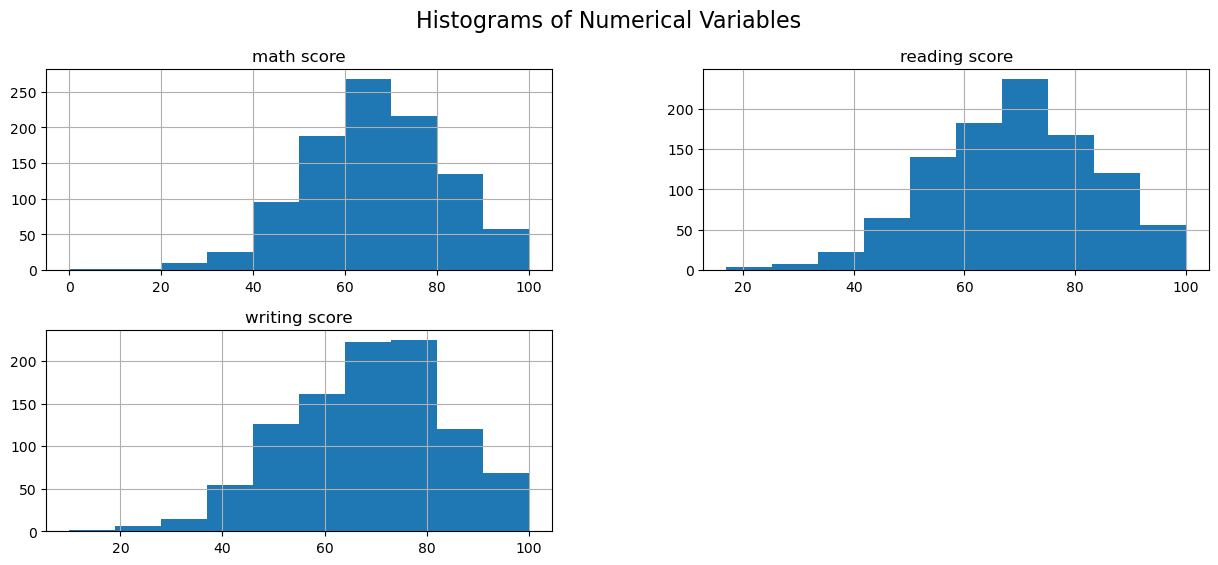

In [288]:
numerical_vars = ['math score', 'reading score', 'writing score']
data[numerical_vars].hist(bins=10, figsize=(15, 6))
plt.suptitle('Histograms of Numerical Variables', fontsize=16)
plt.show()

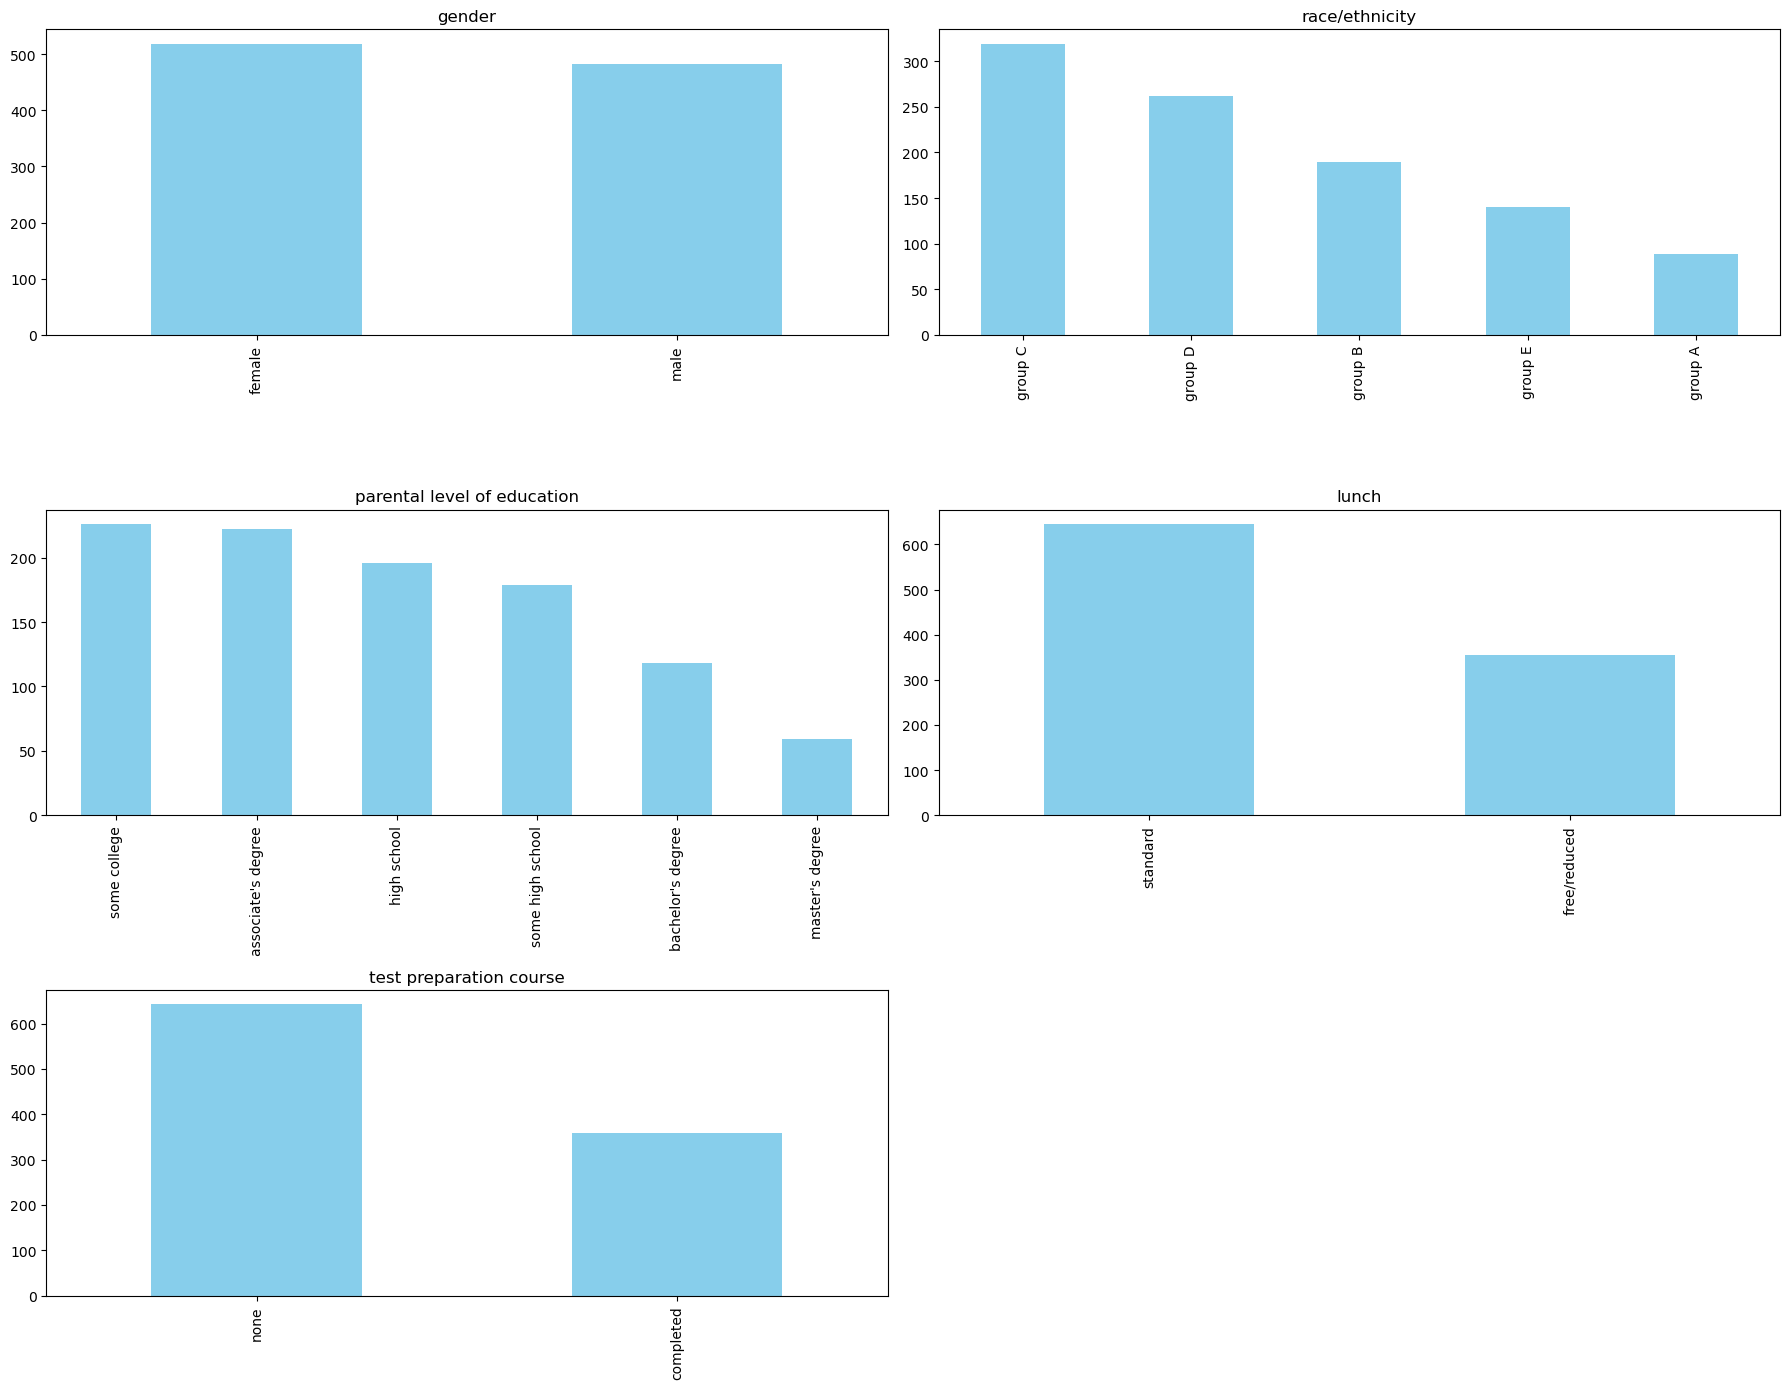

In [289]:
# Plot bar plots for categorical variables
categorical_vars = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

plt.figure(figsize=(18, 14))
for i, col in enumerate(categorical_vars, 1):
    plt.subplot(3, 2, i)
    data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()


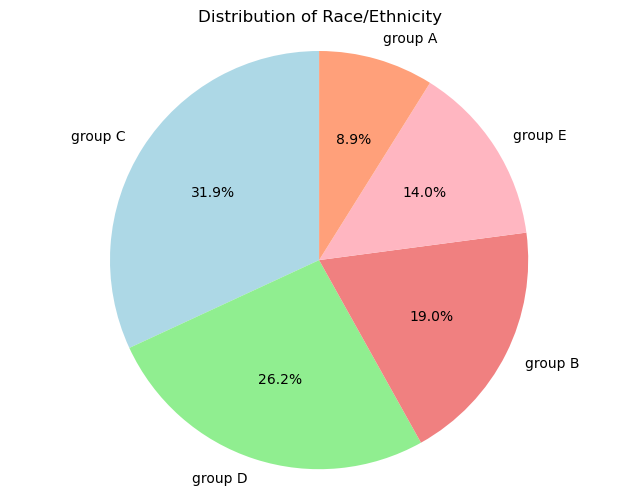

In [290]:
# Plot a pie chart for the distribution of race/ethnicity
plt.figure(figsize=(8, 6))
data['race/ethnicity'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightsalmon'])
plt.title('Distribution of Race/Ethnicity')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


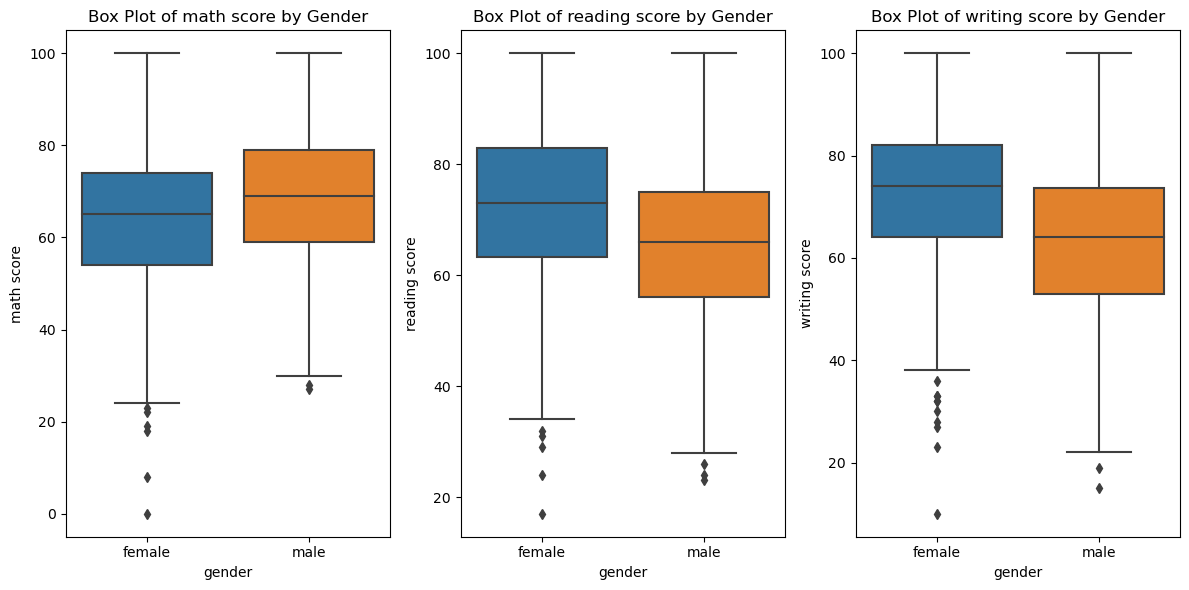

In [254]:
# Plot box plots for numerical variables grouped by a categorical variable
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_vars, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='gender', y=col, data=data)
    plt.title(f'Box Plot of {col} by Gender')
plt.tight_layout()
plt.show()


In [255]:
data.min()

gender                                     female
race/ethnicity                            group A
parental level of education    associate's degree
lunch                                free/reduced
test preparation course                 completed
math score                                      0
reading score                                  17
writing score                                  10
dtype: object

In [256]:
data.max()

gender                                     male
race/ethnicity                          group E
parental level of education    some high school
lunch                                  standard
test preparation course                    none
math score                                  100
reading score                               100
writing score                               100
dtype: object

In [257]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


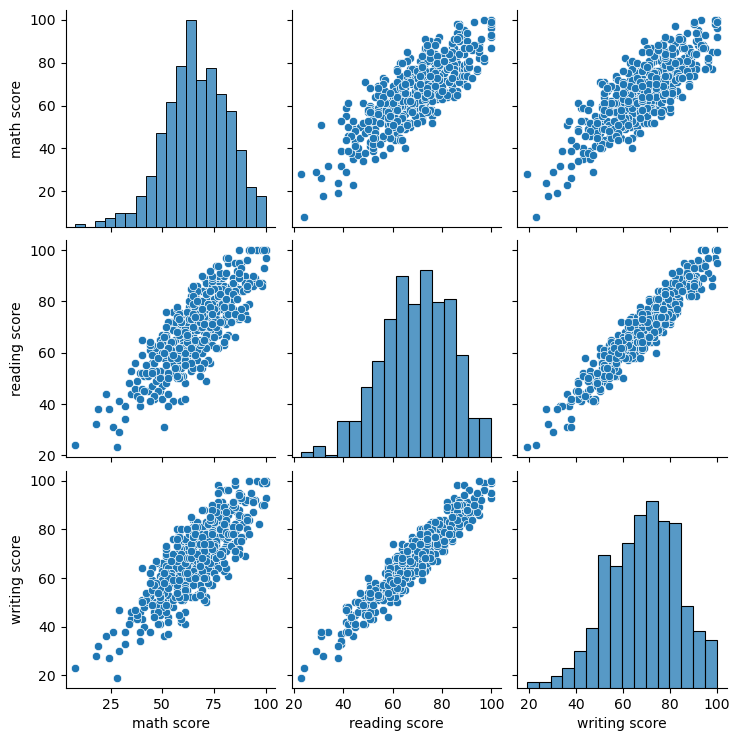

In [258]:
sns.pairplot(p)
plt.show()


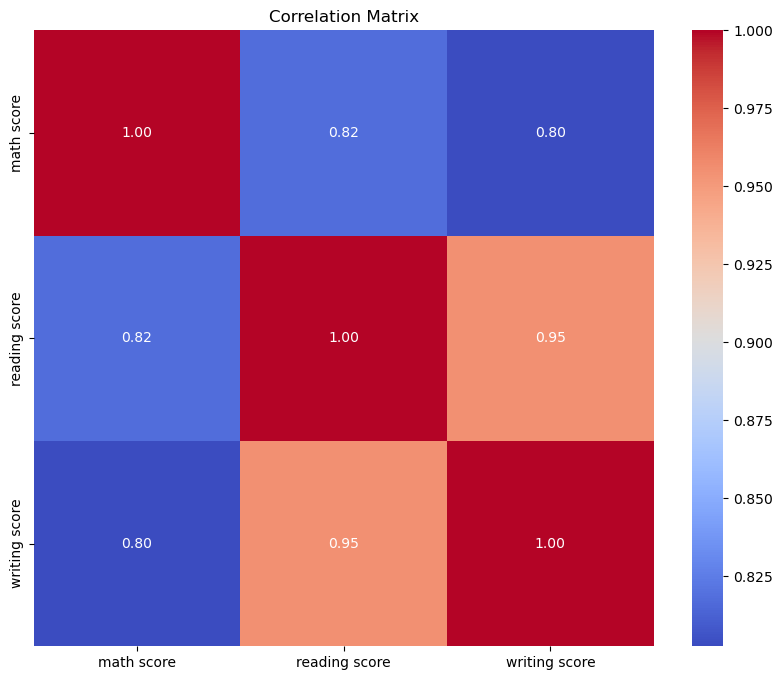

In [259]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Separate features (X) and target variable (y)

In [336]:
# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)

# Split features and target variable
X = data.drop('writing score', axis=1)
y = data['writing score']

# Feature scaling (optional, but can be beneficial for certain algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [337]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [338]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [339]:
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)

RandomForestRegressor()

# Make predictions

In [340]:
linear_pred = linear_model.predict(X_test)
tree_pred = tree_model.predict(X_test)
forest_pred = forest_model.predict(X_test)

# Evaluate the models

In [341]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Model:")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}\n")

# LINEAR REGRESSION

In [342]:
evaluate_model(y_test, linear_pred, "Linear Regression")

Linear Regression Model:
Mean Squared Error: 14.911021437246674
R^2 Score: 0.9381328994057507



# PREDICTION USING LINEAR REGRESSION

In [343]:
linear_pred = linear_model.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Linear Predicted': linear_pred})

In [344]:
print(results.head())

     Actual  Linear Predicted
521      84         88.634480
737      73         66.631764
740      72         73.579121
660      73         71.251040
411      78         79.864976


In [345]:
print(results.tail())

     Actual  Linear Predicted
408      56         61.104902
332      53         56.064994
208      76         79.073317
613      74         75.164915
78       72         75.241410


# DECISION TREE

In [346]:
evaluate_model(y_test, tree_pred, "Decision Tree")

Decision Tree Model:
Mean Squared Error: 30.78625
R^2 Score: 0.8722652211529914



# PREDICTION USING DECISION TREE

In [347]:
tree_pred = tree_model.predict(X_test)
results = pd.DataFrame({'Actual': y_test,'Decision Tree Predicted': tree_pred})

In [348]:
print(results.head())

     Actual  Decision Tree Predicted
521      84                     82.0
737      73                     72.0
740      72                     70.0
660      73                     69.0
411      78                     79.0


In [349]:
print(results.tail())

     Actual  Decision Tree Predicted
408      56                     64.0
332      53                     54.0
208      76                     79.0
613      74                     73.0
78       72                     80.0


# RANDOM FOREST 

In [350]:
evaluate_model(y_test, forest_pred, "Random Forest")

Random Forest Model:
Mean Squared Error: 19.949221450833335
R^2 Score: 0.9172289775405515



# PREDICTION USING RANDOM FOREST 

In [351]:
forest_pred = forest_model.predict(X_test)
results = pd.DataFrame({'Actual': y_test,'Random Forest Predicted': forest_pred})

In [352]:
print(results.head())

     Actual  Random Forest Predicted
521      84                  89.1700
737      73                  69.5100
740      72                  72.0400
660      73                  73.7900
411      78                  83.2825


In [353]:
print(results.tail())

     Actual  Random Forest Predicted
408      56                    61.11
332      53                    55.85
208      76                    78.91
613      74                    74.14
78       72                    76.06
